# 2. Consuming the data using Kafka
## 2.2 Memory Event Consumer

In [1]:
# Import all the required libraries
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
from json import loads

import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Define the topic name
topic = 'memory_stream'

In [3]:
# Define a function to connect to the kafka producer
def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms = 20000, # stop iteration if no message after 20 sec
                                   auto_offset_reset = 'latest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers = ['localhost:9092'],
                                   value_deserializer = lambda x: loads(x.decode('ascii')),
                                   api_version = (0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

In [4]:
# Define a function to plot the graph
def init_plots():
    try:
        width = 12
        height = 8
        fig = plt.figure(figsize = (width, height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))

In [5]:
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        # Different containers for different machines
        x, y_4, y_5, y_6, y_7, y_8 = [], [], [], [], [], []
        
        for message in consumer:
            
            # Filter out the count of records based on the different machines and append the count in respective containers
            y_4.append(len(list(filter(lambda m: m['machine'] == '4', message.value))))
            y_5.append(len(list(filter(lambda m: m['machine'] == '5', message.value))))
            y_6.append(len(list(filter(lambda m: m['machine'] == '6', message.value))))
            y_7.append(len(list(filter(lambda m: m['machine'] == '7', message.value))))
            y_8.append(len(list(filter(lambda m: m['machine'] == '8', message.value))))
            
            # Append the processing time to the x axis list
            x.append(dt.datetime.utcnow())
            
            # Check if the length of the records satisfies the 2-minute interval requirement
            if len(y_4) > 11:
                ax.clear()
                # Plot a line graph for each machine in the same graph
                ax.plot(x, y_4, label = 'machine 4')
                ax.plot(x, y_5, label = 'machine 5')
                ax.plot(x, y_6, label = 'machine 6')
                ax.plot(x, y_7, label = 'machine 7')
                ax.plot(x, y_8, label = 'machine 8')
                ax.set_xlabel('Time (UTC)')
                ax.set_ylabel('Message Count')
                ax.set_ylim(0, 90)
                ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])
                # Define a legend to the plot
                plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc = 'lower left',
                           ncol = 5, mode = 'expand', borderaxespad = 0.)
                fig.suptitle('Real-time Memory Stream Visualisation for Record Count') # giving figure a title
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y_4.pop(0)
                y_5.pop(0)
                y_6.pop(0)
                y_7.pop(0)
                y_8.pop(0)
        plt.close('all')

    except Exception as ex:
        print(str(ex))

<IPython.core.display.Javascript object>


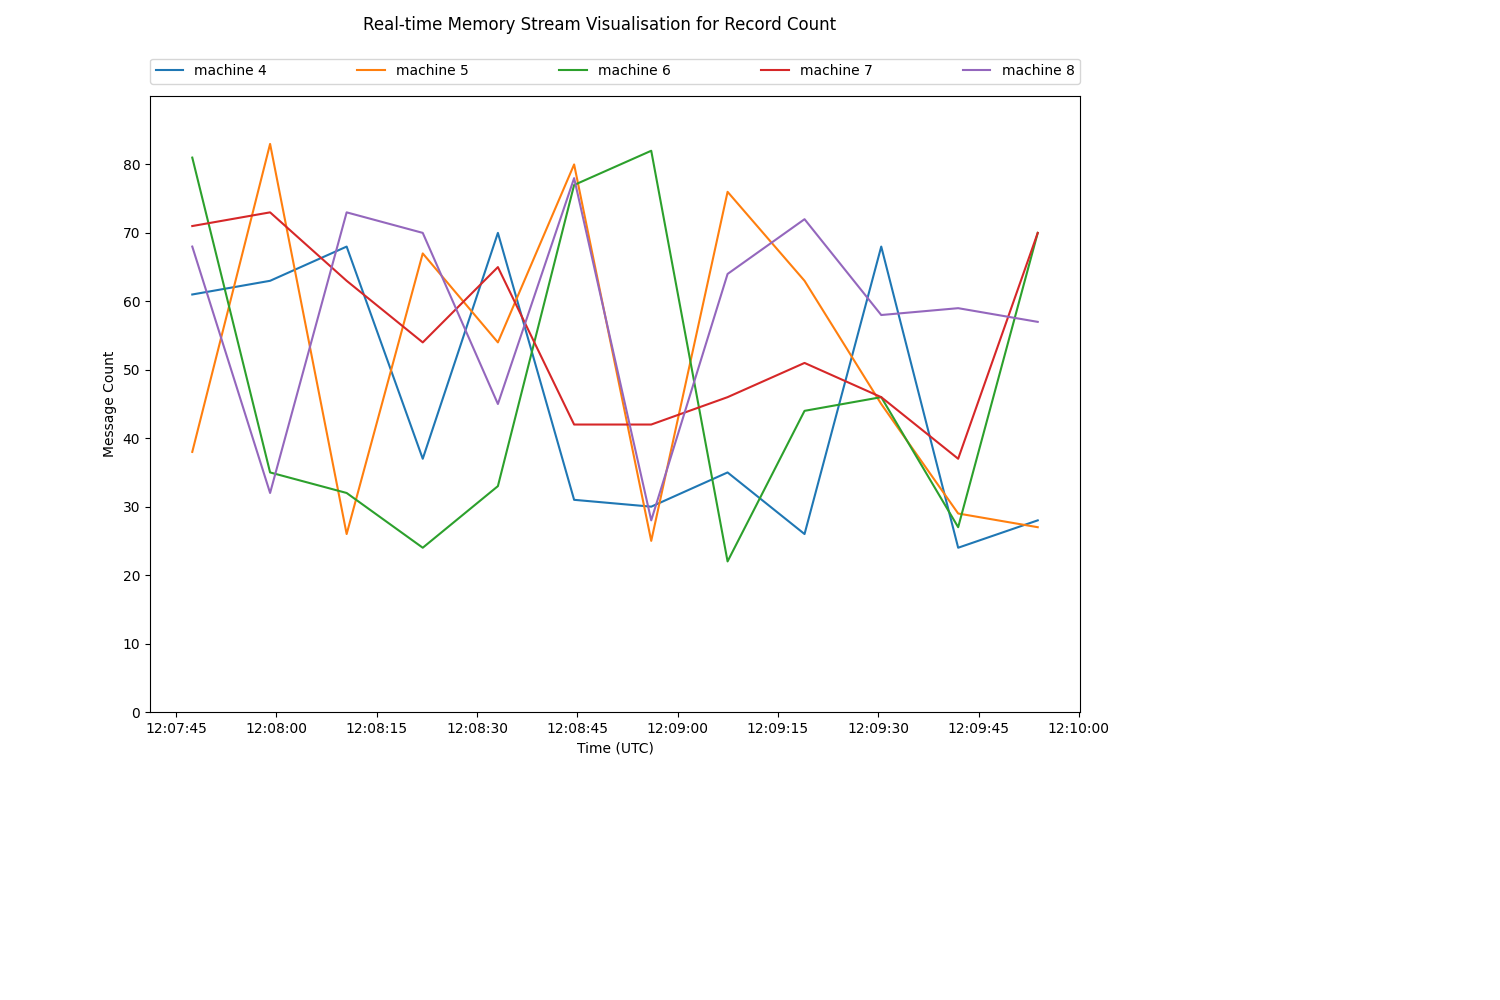

KeyboardInterrupt: 

In [6]:
# Consume the produced messages
if __name__ == '__main__':
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()    
    consume_messages(consumer, fig, ax)